In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2

In [ ]:
from tensorflow.keras.utils import img_to_array

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [ ]:
train_images = "C:\\Users\\HP\\Desktop\\XAI\\chest_xray\\train"

In [ ]:
#out_img="D:\\deep learning\\chestxray output.jpg"

In [ ]:
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
train_generator.classes.shape

(5216,)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory("C:\\Users\\HP\\Desktop\\XAI\\chest_xray\\val",
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 16 images belonging to 2 classes.


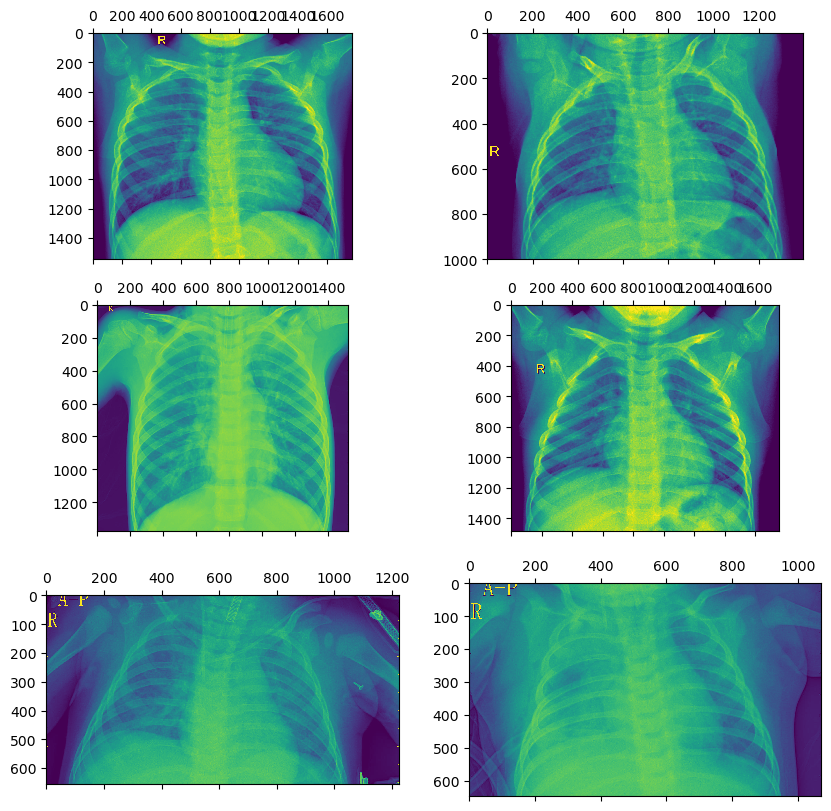

In [ ]:
#Pneumonia
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[2679]))
plot6.matshow(plt.imread(train_generator.filepaths[2710]))

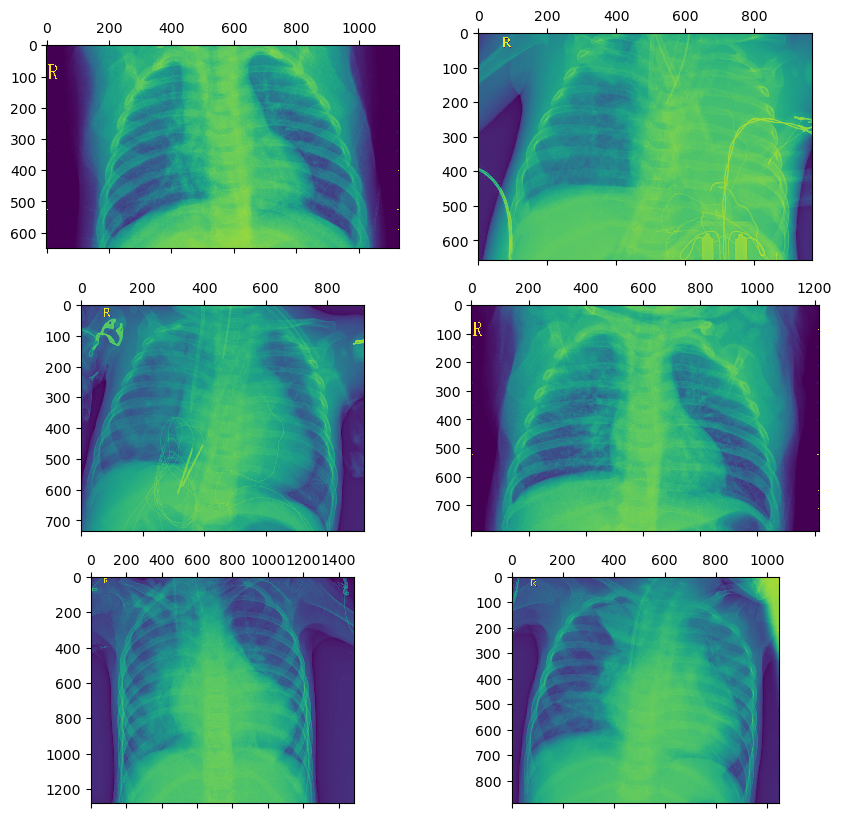

In [ ]:
#Normal
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))
plot5.matshow(plt.imread(train_generator.filepaths[1345]))
plot6.matshow(plt.imread(train_generator.filepaths[1349]))

In [ ]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [ ]:
history = model.fit(train_generator, epochs = 2, validation_data = validation_generator)

Epoch 1/2
41/41 [==============================] - 323s 8s/step - loss: 0.5327 - accuracy: 0.7600 - val_loss: 0.7693 - val_accuracy: 0.7500
Epoch 2/2
41/41 [==============================] - 313s 8s/step - loss: 0.2772 - accuracy: 0.8783 - val_loss: 0.7132 - val_accuracy: 0.6875


1/1 [==============================] - 0s 145ms/step
predicted class is : [[0.745931  ]
 [0.9999378 ]
 [0.9995261 ]
 [0.2170188 ]
 [0.9936075 ]
 [0.51356584]
 [0.9887277 ]
 [0.8998214 ]
 [0.9980336 ]
 [0.7615445 ]
 [0.11141812]
 [0.9920264 ]
 [0.9789517 ]
 [0.06688855]
 [0.9978446 ]
 [0.9157325 ]]


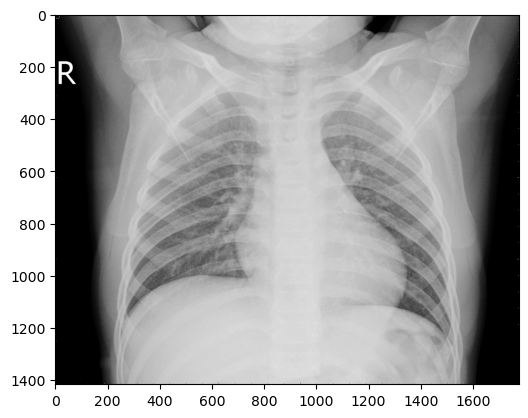

In [ ]:
pre=model.predict(validation_generator.__getitem__(0)[0])
print('predicted class is : {}'.format(pre))
img = plt.imread(validation_generator.filepaths[0])
plt.imshow(img, cmap='gray')

In [ ]:
x_train,y_train=next(train_generator)
x_test,y_test=next(validation_generator)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
eval_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = eval_datagen.flow_from_directory(
    "C:\\Users\\HP\\Desktop\\XAI\\chest_xray\\test",
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

eval_result = model.evaluate_generator(test_generator, 624)
print('loss :', eval_result[0])
print('accuracy :', eval_result[1])

Found 624 images belonging to 2 classes.


C:\Users\HP\AppData\Local\Temp\ipykernel_14952\381789614.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result = model.evaluate_generator(test_generator, 624)


loss : 0.5137519240379333
accuracy : 0.8028846383094788


In [ ]:
img= cv2.imread('C:\\Users\\HP\\Desktop\\XAI\\chest_xray\\test\\NORMAL\\IM-0017-0001.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

1/1 [==============================] - 0s 40ms/step


array([[0.33138958]], dtype=float32)

1/1 [==============================] - 0s 30ms/step
Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

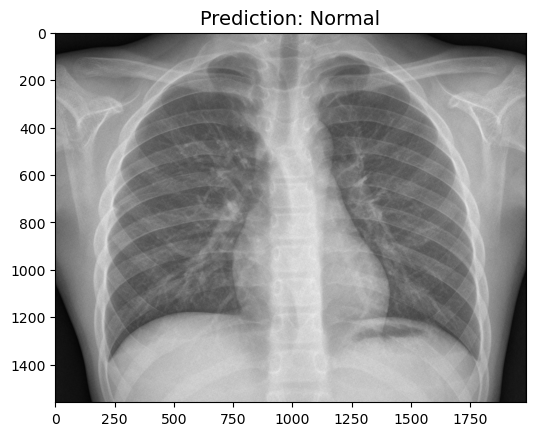

In [ ]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

In [ ]:
from lime import lime_image
import time

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(validation_generator.__getitem__(0)[0][11].astype('double'), model.predict, top_labels=1, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 98ms/step


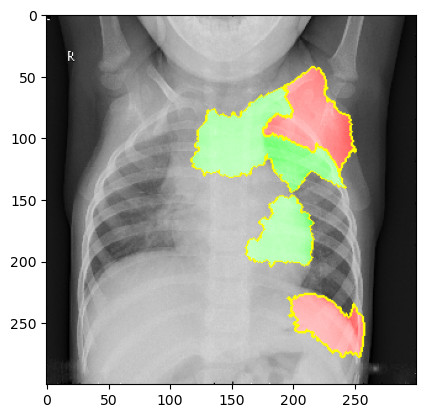

In [ ]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

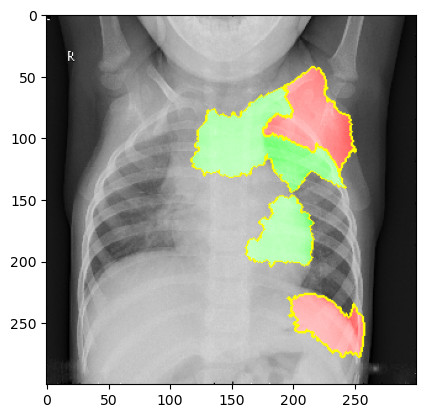

In [ ]:
temp1, mask1= explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp1, mask1))

(-0.5, 299.5, 299.5, -0.5)

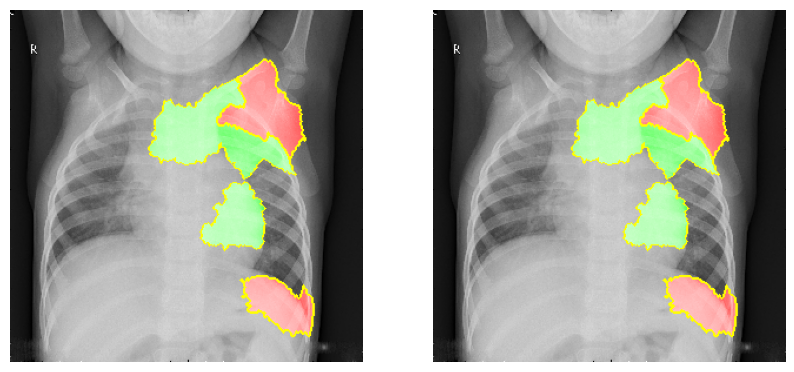

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
ax1.imshow(mark_boundaries(temp1, mask1))
ax2.imshow(mark_boundaries(temp, mask))
ax1.axis('off')
ax2.axis('off')

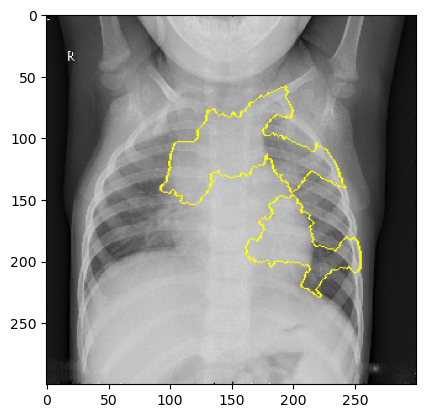

In [ ]:
temp2, mask2= explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp2, mask2))